In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
print("Imports successful")

Imports successful


In [13]:
news = pd.read_csv("data/news.csv")
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [14]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [17]:
news['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [15]:
options = ['REAL', 'FAKE']
news = news.loc[news['label'].isin(options)]

In [16]:
news['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

Text(0, 0.5, 'News Type')

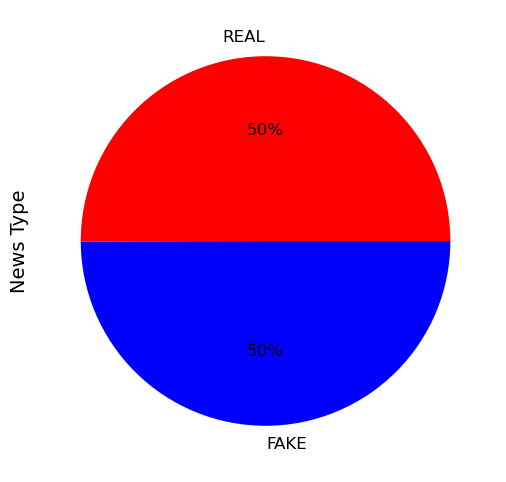

In [19]:
# Visualize the distribution
news.label.value_counts().plot(kind='pie', autopct='%1.0f%%',
                    fontsize=12, figsize=(9,6), colors=["red", "blue"])
plt.ylabel('News Type', size=14)

## dataset articles equally distributed between real news and fake news

In [48]:
# Divide Dataset into features and labels
# Features only include the text not the title of the article
features = news.loc[:, 'text'].values
labels = news.loc[:, 'label'].values

In [50]:
# Split into training and test data (80/20 split)

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(
    news['text'],labels, test_size=0.2, random_state=7)

Tf-Idf scores words the highest that occur often in a single article but are rare among all documents. This gets rid of stop words, e.g. the, a, is..., while promoting those words that have true meaning and change the content of the article.

In [54]:
# Use TF-IDF to convert text features into vectors
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=('english'), max_df=0.7)

# Fit and transform training and test data sets
tfidf_train = tfidf_train = vectorizer.fit_transform((x_training_data).astype('U'))
tfidf_test = vectorizer.transform(x_test_data)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jonasmaximilian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
#Approach 1: Passive Agressive Classifier
pa = PassiveAggressiveClassifier(max_iter=50)
# Train model on training data
pa.fit(tfidf_train, y_training_data)
# Make predictions
predictions_pa = pa.predict(tfidf_test)

In [57]:
pa = accuracy_score(y_test_data, predictions_pa)
print(f'Accuracy: {round(pa*100,2)}%')

Accuracy: 92.74%


In [58]:
# Evaluate performance of the model
print(classification_report(y_test_data, predictions_pa))

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [59]:
# Approach 2: Logistic Regression Model
model_lr = LogisticRegression(max_iter=150)
# Train model on training data
model_lr.fit(tfidf_train, y_training_data)
# Make prediction on test data
predictions_lr = model_lr.predict(tfidf_test)

In [61]:
lr = accuracy_score(y_test_data, predictions_lr)
print(f'Accuracy: {round(lr*100,2)}%')

Accuracy: 91.71%


In [62]:
# Evaluate performance of this model
print(classification_report(y_test_data, predictions_lr))

              precision    recall  f1-score   support

        FAKE       0.90      0.94      0.92       638
        REAL       0.94      0.89      0.91       629

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

